In [1]:
import pandas as pd


In [2]:
pd.read_csv('./train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## 전처리

In [4]:
df_train.columns
df_test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train.describe()
# shows the summary statistics of the data (only numerical columns)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.info()
#shows general information about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Pclass -> Passenger Class

df_train['Pclass'].value_counts().sort_index(ascending=False)

#ascending=False -> sort in descending order
#.sort_index() -> sort by index
#.value_counts() -> count the number of unique values


Pclass
3    491
2    184
1    216
Name: count, dtype: int64

In [9]:
df_train['SibSp'].value_counts().sort_index()
df_train['SibSp'].value_counts().sort_values()


SibSp
5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: count, dtype: int64

In [10]:
df_train['Parch'].value_counts().sort_index()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

In [11]:
df_train['Fare']

#숙제
#Fare을 그룹 10개로 나눠서 value_counts 해보기
# 1. Count를 even하게 나누기 (891개니까 그룹당 89개) - Fare_Group_1에 저장
# 2. 값을 기준으로 나누기 (0~10, 10~20, 20~30, 30~40, 40+) - Fare_Group_2에 저장

df_train['Fare_Group_1'] = pd.qcut(df_train['Fare'], q=[i /10 for i in range(0,11)], labels=[i for i in range(0,10)])
print(Fare_Group_1)
df_train['Fare_Group_2'] = pd.cut(df_train['Fare'], [0, 10, 20, 30, 40, max(df_train['Fare'])], labels=[0, 1, 2, 3, 4])
print(Fare_Group_2)
#pd.cut -> 범위를 지정해서 나누기
#pd.qcut -> 개수를 지정해서 나누기
#pd.cut, pd.qcut 모두 범위를 지정할 때는 []를 사용


NameError: name 'Fare_Group_1' is not defined

## NAN 이란?

In [ ]:
# .isnan() -> check if the value is NaN
# .isnull() -> check if the value is null

df_train['Age'].isnull().sum() / len(df_train['Age']) * 100

# df_train.dropna(subset=['Age']) # --> drop the rows where Age is NaN
# df_train.dropna(how='all') # --> drop the rows where all the values are NaN
# df_train.dropna(how='any') # --> drop the rows where any of the values are NaN
# df_train.fillna(value=0).head(6) # --> fill the NaN values with 0 or 6th row
# df_train['Age'].fillna(0) # --> fill the NaN values with 0 for 'Age' column
# df_train['Age'].fillna(df_train['Age'].mean()) # --> fill the NaN values with the mean of 'Age' column    
# df_train['Age'].fillna(method='ffill') # --> fill the NaN values with the previous value
# df_train['Age'].fillna(method='bfill') # --> fill the NaN values with the next value





19.865319865319865

## Categorial Data


In [ ]:
##name
df_train[df_train['Name'].str.contains(r'Dr. ')]

##r = raw data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group_1,Fare_Group_2
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,9,4
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,4,1
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,3,1
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,7,3
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,9,4
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,7,3
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,6,2


In [ ]:
## Sex

df_train['Sex'].value_counts()

### One-Hot encoding

# Method 1
pd.get_dummies(df_train['Sex'])

# Method 2
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False)
encoded = encoder.fit_transform(df_train[['Sex']]) #--> 두번 묶어서 data frame
pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [ ]:
# Ticket

df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [ ]:
# Cabin

#df_train['Cabin']
cabin_only = df_train[['Cabin']].copy()
# Null 값 제외
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)
# Deck 값 추출 (앞에 알파벳)
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
# Room 값 추출
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float") ##"([0-9]+)" -> 숫자만 추출 (Regular Expression)

cabin_only[cabin_only["Cabin_Data"]] 

,Cabin,Cabin_Data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
...,...,...,...,...
871,D35,True,D,35.0
872,B51 B53 B55,True,B,51.0
879,C50,True,C,50.0
887,B42,True,B,42.0


In [ ]:
# Embarked

df_train['Embarked']
pd.get_dummies(df_train['Embarked'])
pd.get_dummies(df_train['Embarked'], prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


## Visualization


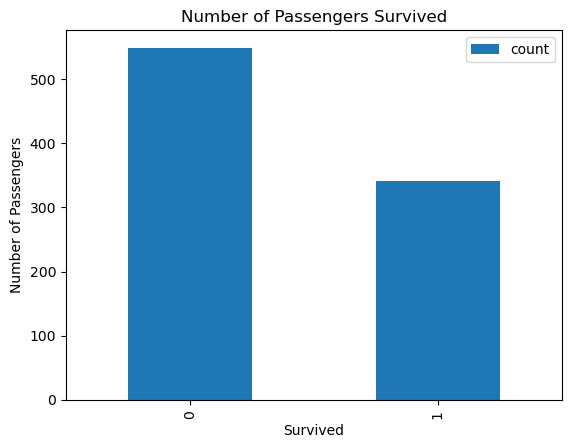

In [ ]:
import matplotlib.pyplot as plt

plot = df_train['Survived'].value_counts().plot(kind='bar')
plot.set_xlabel('Survived')
plot.set_ylabel('Number of Passengers')
plot.set_title('Number of Passengers Survived')
plot.legend()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


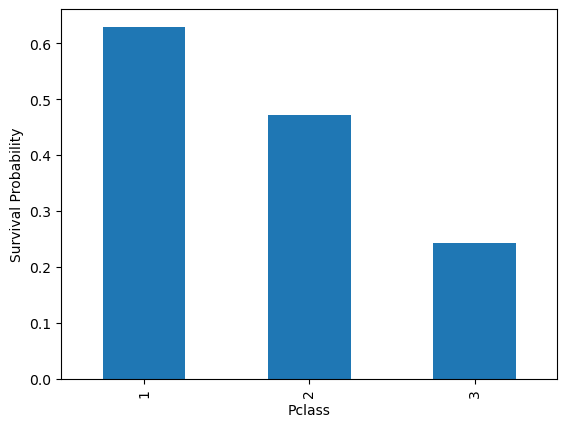

In [ ]:
plot = df_train[['Pclass', 'Survived']].groupby('Pclass').mean()['Survived'].plot(kind='bar')
plot.set_xlabel('Pclass')
plot.set_ylabel('Survival Probability')

df_train[['Pclass', 'Survived']].groupby('Pclass')['Survived'].describe()

Fare_Group_1
0     92
1     87
2    106
3     78
4     84
5     88
6     89
7     91
8     89
9     87
Name: count, dtype: int64

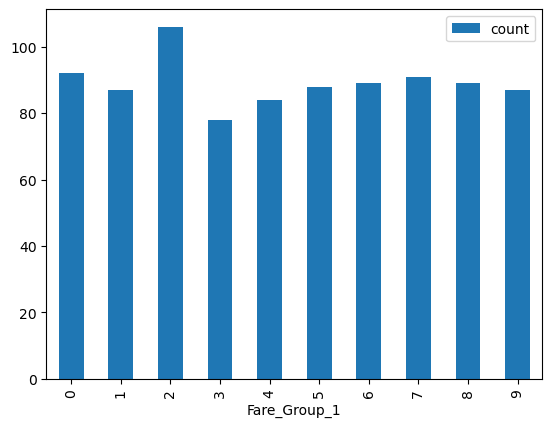

In [ ]:
plot = df_train['Fare_Group_1'].value_counts().sort_index().plot(kind='bar')
plot.legend()
df_train['Fare_Group_1'].value_counts().sort_index()

Fare_Group_2
0    321
1    179
2    142
3     58
4    176
Name: count, dtype: int64

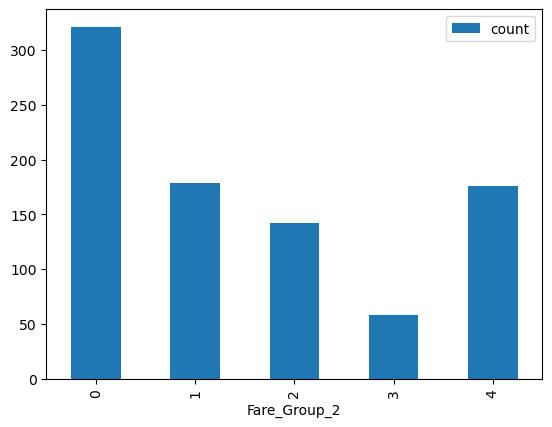

In [ ]:
plot = df_train['Fare_Group_2'].value_counts().sort_index().plot(kind='bar')
plot.legend()
df_train['Fare_Group_2'].value_counts().sort_index()


In [ ]:
## Correlation

df_train.corr(numeric_only=True)

## Bigger the P class lower the survival rate 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


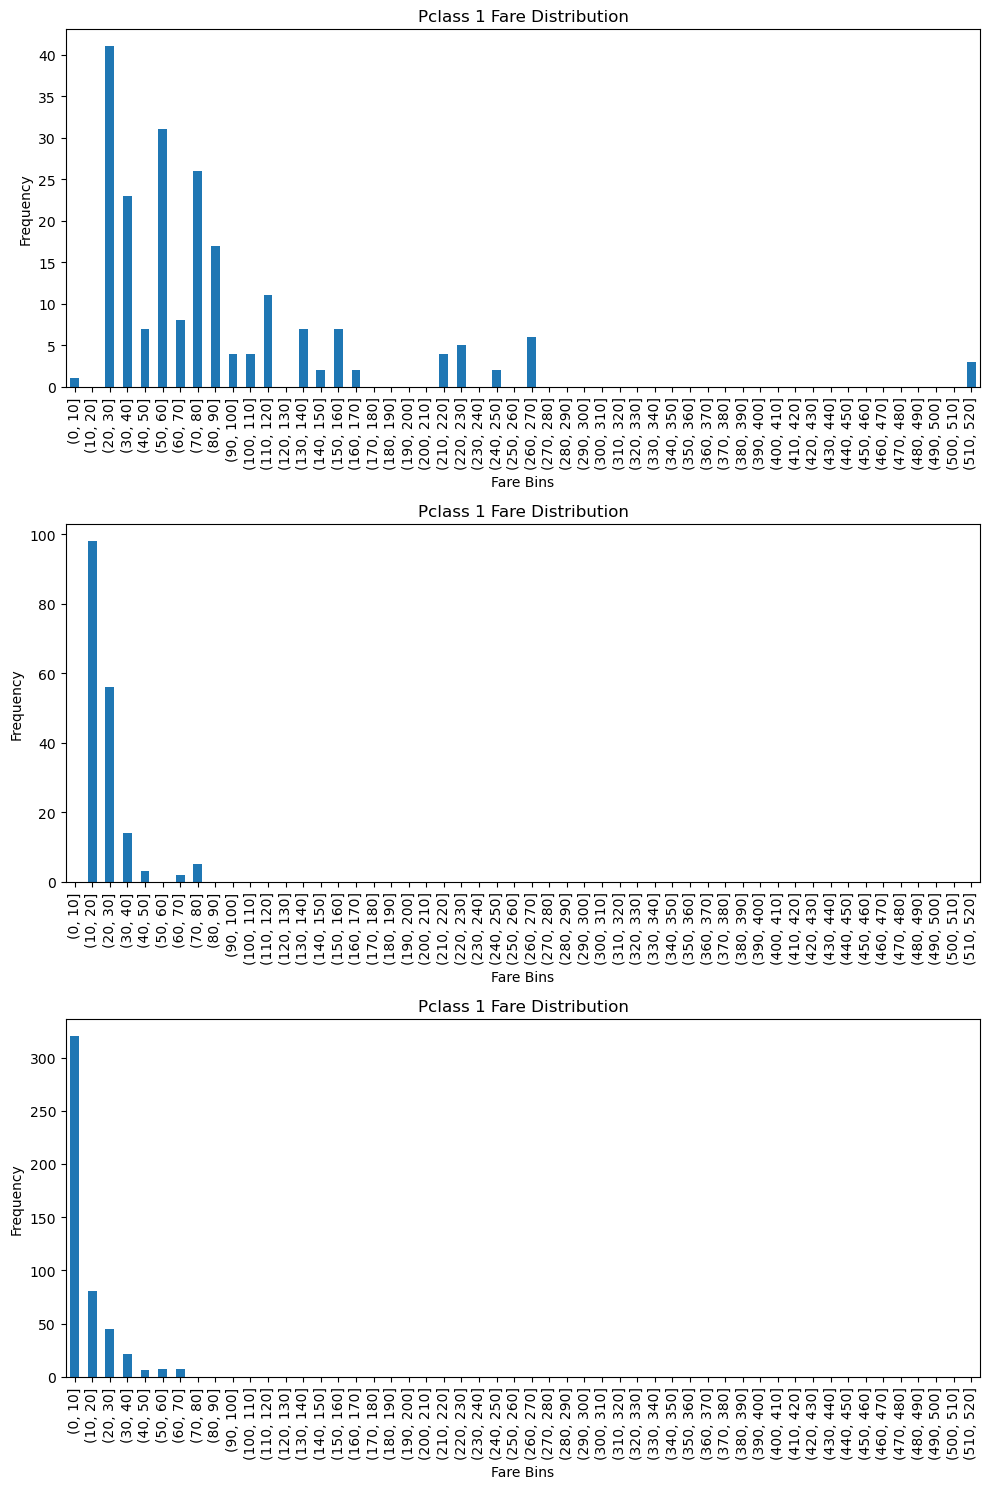

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
'''
숙제
1. Pclass vs. Fare
- 하나의 subplot 마다 Pclass 하나
- Fare은 scale of 10 (10씩 그룹지어서 그래프 생성)

2. Pclass vs. Age
- 하나의 subplot 마다 pclass 하나
'''
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

bins = [i * 10 for i in range(int(max(df_train['Fare']) / 10) + 2)]

pd.cut(df_train[df_train['Pclass'] == 1]["Fare"], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Pclass 1 Fare Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 2]["Fare"], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Pclass 1 Fare Distribution')
axes[1].set_xlabel('Fare Bins')
axes[1].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 3]["Fare"], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Pclass 1 Fare Distribution')
axes[2].set_xlabel('Fare Bins')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




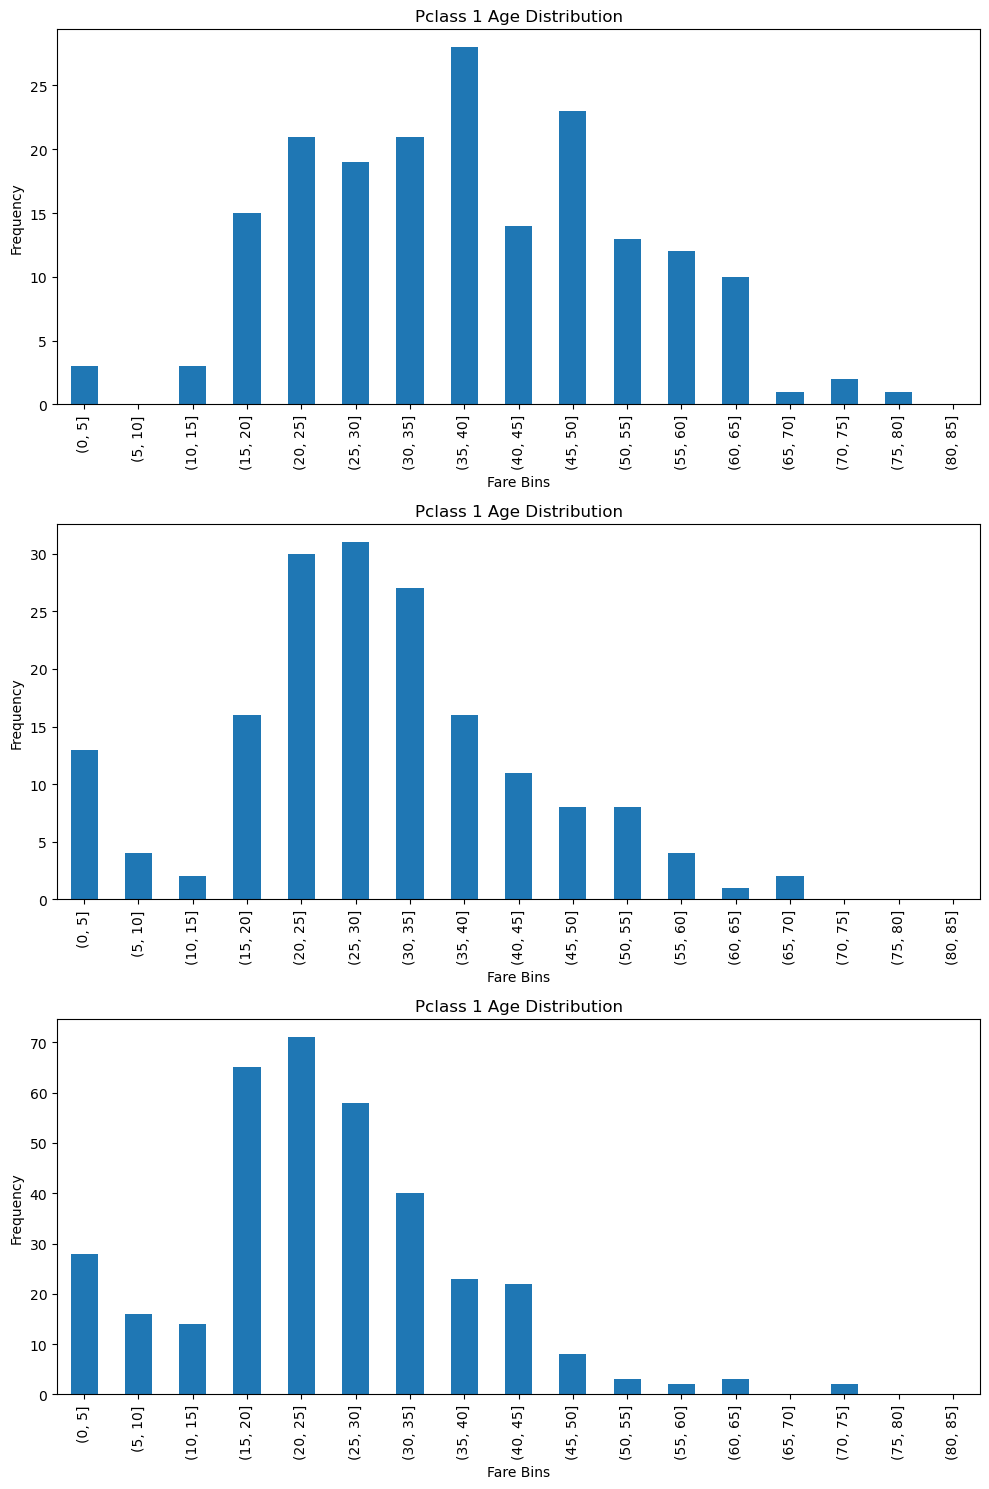

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

bins = [i * 5 for i in range(int(max(df_train['Age']) / 5) + 2)]

pd.cut(df_train[df_train['Pclass'] == 1]["Age"], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Pclass 1 Age Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 2]["Age"], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Pclass 1 Age Distribution')
axes[1].set_xlabel('Fare Bins')
axes[1].set_ylabel('Frequency')

pd.cut(df_train[df_train['Pclass'] == 3]["Age"], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Pclass 1 Age Distribution')
axes[2].set_xlabel('Fare Bins')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
'''
숙제 
1. Logistic Regression 뭔지 배워오기
2. K nerest neighbors 뭔지 배워오기
3. Decision Tree 뭔지 배워오기
'''

## ML

Training data를 사용해서 모델 param을 결정 (python이 알아서)
해당 pram을 가진 모댈을 test 데이터로 확인

중요한것 >
training data로 무엇을 사용해야하나
x값이 independent, y값이 dependent variable

scaling
-minmaxscaling 
-standard scaling

질문)
0. scaling을 왜하나
> 나이 0-100, 재산 0-1M --> scale이 다르면 모델의 feature importance에 bias가 생김 ()
> 모델 정확도에 안좋은 영향을 끼친다
> data normalization에 필요

1. training data랑 testing data를 한번에 scaling 해야하나
> 따로따로 진행

2. testing data에 결과가 없는 경우가 많다 
> 우리가 예측값을 모르게 때문에 training 하는것. testind data 가 없는경우가 많다
> training data 내부에서 subclass로 나누고 testing data 를 선택해서 다른 subclass랑 비교.
> cross-validation



In [ ]:
## Step1: Divide featurea into x and y
x_train, y_train = df_train[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']].copy(), df_train['Survived'].copy() 
x_test, y_test = df_test[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']].copy(), pd.read_csv('gender_submission.csv',usecols=['Survived'])

## Columns to use

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Pclass - Use Apply
x_train['Pclass'] = x_train[['Pclass']].apply(lambda x: (x - 1)  / (max(x) - min(x)))
x_test['Pclass'] = x_test[['Pclass']].apply(lambda x: (x - 1) / (max(x) - min(x)))

# Age - Use Apply
scaler = MinMaxScaler()

x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_test['Age'] = scaler.fit_transform(x_test[['Age']])

# Sex
encoder = OneHotEncoder(sparse_output=False)
x_train[['Sex_Female', 'Sex_Male']] = encoder.fit_transform(x_train[['Sex']])
x_test[['Sex_Female', 'Sex_Male']] = encoder.fit_transform(x_test[['Sex']])

# Fare
# Make it look like it is normal distribution by taking log
# Then Use StandardScaler
import math
x_train['Fare'] = x_train['Fare'].fillna(0).apply(lambda x: math.log10(x+0.001))
x_test['Fare'] = x_test['Fare'].fillna(0).apply(lambda x: math.log10(x+0.001))

std_scaler = StandardScaler()

x_train['Fare'] = std_scaler.fit_transform(x_train[['Fare']])
x_test['Fare'] = std_scaler.fit_transform(x_test[['Fare']])

# Make a new column named Family_Exist by adding SibSp and Parch
x_train['Family_Exist'] = x_train['SibSp'] + x_train['Parch']
x_test['Family_Exist'] = x_test['SibSp'] + x_test['Parch']
x_train['Family_Exist'] = x_train['Family_Exist'].apply(lambda x: 0 if x == 0 else 1)
x_test['Family_Exist'] = x_test['Family_Exist'].apply(lambda x: 0 if x == 0 else 1)

# Finalize the necessary columns
x_train = x_train[['Pclass', 'Age', 'Sex_Female', 'Sex_Male', 'Fare', 'Family_Exist']].copy()
x_test = x_test[['Pclass', 'Age', 'Sex_Female', 'Sex_Male', 'Fare', 'Family_Exist']].copy()
 

[Text(0.33295624484323433, 0.98, 'x[3] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.15661097359735973, 0.94, 'x[0] <= 0.75\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]'),
 Text(0.24478360922029702, 0.96, 'True  '),
 Text(0.054455445544554455, 0.9, 'x[1] <= 0.026\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.036303630363036306, 0.86, 'x[4] <= 0.867\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0297029702970297, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0429042904290429, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07260726072607261, 0.86, 'x[4] <= 0.372\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.056105610561056105, 0.82, 'x[4] <= 0.358\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.04950495049504951, 0.78, 'x[1] <= 0.698\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.036303630363036306, 0.74, 'x[1] <= 0.29\ngini = 0.14\nsamples = 66\nvalue = [5, 61]'),
 Text(0.0297029702970297, 0.7

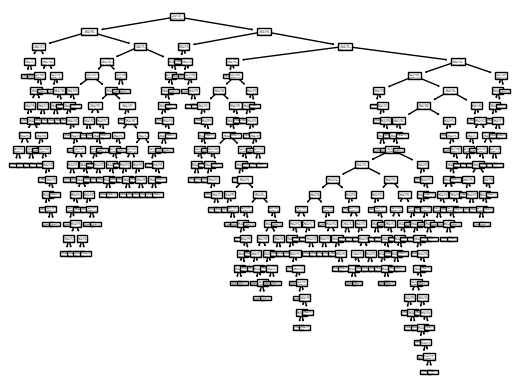

In [ ]:
## 1. Logistic Regression --------------------------------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression

# 모델 생성 / train
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

# 모델 test
y_test['Survived_Prediction_logistic'] = logistic.predict(x_test)

# 결과 확인
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_pred=y_test[['Survived_Prediction_logistic']], y_true=y_test[['Survived']])
confusion_matrix

# array([[258, 8], 
#       [  6, 146]]) --> 258 + 146 = 404 correct predictions, 8 + 6 = 14 incorrect predictions 왼쪽 대각선이 맞은 것, 오른쪽 대각선이 틀린 것

## 2. K nearest neighbors --------------------------------------------------------------------------------------------  
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_test['Survived_Prediction_knn'] = knn.predict(x_test)

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_pred=y_test[['Survived_Prediction_knn']], y_true=y_test[['Survived']])
confusion_matrix

#array([[247,  19], 
#       [ 28, 124]])  --> 247 + 124 = 371 correct predictions, 19 + 28 = 47 incorrect predictions

## 3. Decision Tree --------------------------------------------------------------------------------------------    
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_test['Survived_Prediction_tree'] = clf.predict(x_test)

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test[['Survived_Prediction_tree']],y_test[['Survived']])
confusion_matrix

#array([[231,  56], 
#       [ 35,  96]]) --> 231 + 96 = 327 correct predictions, 56 + 35 = 91 incorrect predictions

tree.plot_tree(clf)